<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

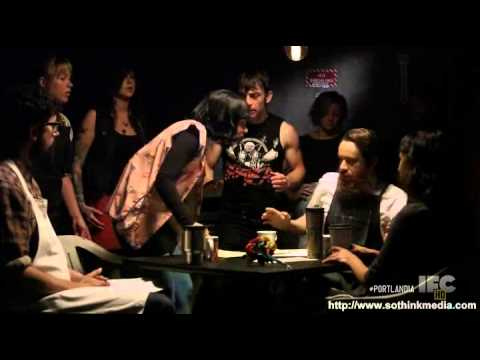

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\iambr\\OneDrive\\Desktop\\Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [226]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

In [210]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [227]:
# add date column as date only
shops["date"]=shops["full_review_text"]
date = lambda x: x["date"].strip().split(" ")[0].strip()
shops["date"] = shops.apply(date, axis=1)

# change star_rating to single integer
star = lambda x: int(str(x["star_rating"]).split(" ")[1].split(".")[0])
shops["star_rating"] = shops.apply(star, axis=1)

# remove date from review text
review = lambda x: " ".join(x["full_review_text"].strip().split(" ")[1:])
shops["full_review_text"] = shops.apply(review, axis=1)
decode = lambda x: re.sub('[^a-zA-Z 0-9]', '', str(x["full_review_text"]))
shops["full_review_text"] = shops.apply(decode, axis=1)


shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [228]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [229]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [230]:
from tqdm import tqdm
tqdm.pandas()
ps = PorterStemmer()

C:\Users\iambr\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [231]:
#stem
shops['stems'] = shops.tokens.progress_apply(lambda x: [ps.stem(word) for word in x])
shops.head(1)



  0%|                                                                                                            | 0/7616 [00:00<?, ?it/s]

  1%|▊                                                                                                 | 60/7616 [00:00<00:12, 594.08it/s]

  2%|█▌                                                                                               | 123/7616 [00:00<00:12, 599.22it/s]

  2%|██▎                                                                                              | 186/7616 [00:00<00:12, 607.31it/s]

  3%|███▎                                                                                             | 256/7616 [00:00<00:11, 626.97it/s]

  4%|████                                                                                             | 322/7616 [00:00<00:11, 634.80it/s]

  5%|████▊                                                                                            | 378/7616 [00:00<00:11, 610.16it/s]

  6%|█████▋       

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,..."


In [29]:
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [50]:
shops.tokens

0       [1, checkin, love, love, loved, the, atmospher...
1       [listed, in, date, night, austin, ambiance, in...
2       [1, checkin, listed, in, brunch, spots, i, lov...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [1, checkin, they, are, located, within, the, ...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object

In [71]:
#lemmas
nlp = spacy.load("en_core_web_lg")
shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)
shops.head()



  0%|                                                                                                            | 0/7616 [00:00<?, ?it/s]

  0%|                                                                                                    | 3/7616 [00:00<05:27, 23.26it/s]

  0%|                                                                                                    | 4/7616 [00:00<08:31, 14.87it/s]

  0%|                                                                                                    | 6/7616 [00:00<08:08, 15.58it/s]

  0%|                                                                                                    | 8/7616 [00:00<10:25, 12.16it/s]

  0%|                                                                                                    | 9/7616 [00:00<13:26,  9.43it/s]

  0%|▏                                                                                                  | 10/7616 [00:00<15:59,  7.93it/s]

  0%|▏            

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, check, locate, Northcross, mall, shopping,..."


In [233]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [234]:
sh = shops.copy()
sh2= sh.copy()
sh.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no..."


In [235]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [236]:
# Tokens-Word Counts
wcTokens = count(shops['tokens'])
print(wcTokens.shape)
wcTokens.head()

(20530, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38,the,6847,34809,1.0,0.044975,0.044975,0.899028
45,and,6864,26650,2.0,0.034433,0.079408,0.901261
51,a,6246,22755,3.0,0.029401,0.108809,0.820116
17,i,5528,20237,4.0,0.026147,0.134957,0.725840
57,to,5653,17164,5.0,0.022177,0.157133,0.742253


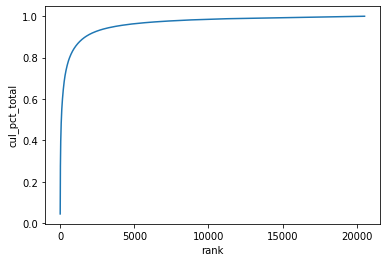

In [237]:
# Tokens- Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wcTokens);

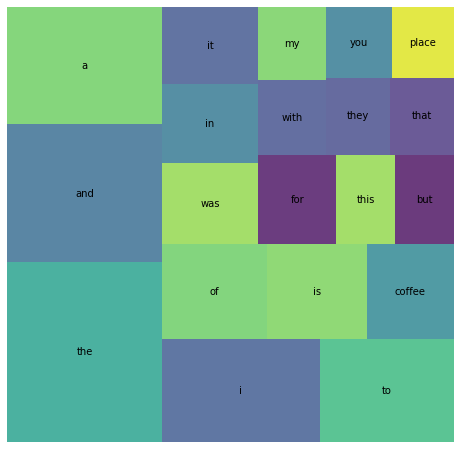

In [238]:
# Tokens
wcTokens_top20 = wcTokens[wcTokens['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcTokens_top20['pct_total'], label=wcTokens_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [239]:
# Stems- Word counts
wcStems = count(shops['stems'])
print(wcStems.shape)
wcStems.head()

(15174, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,the,6847,34809,1.0,0.044975,0.044975,0.899028
43,and,6864,26650,2.0,0.034433,0.079408,0.901261
49,a,6246,22755,3.0,0.029401,0.108809,0.820116
17,i,5528,20237,4.0,0.026147,0.134957,0.725840
57,to,5653,17167,5.0,0.022181,0.157137,0.742253


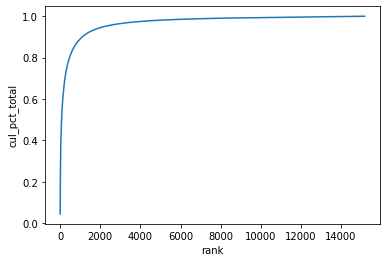

In [240]:
# Stems- Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wcStems);

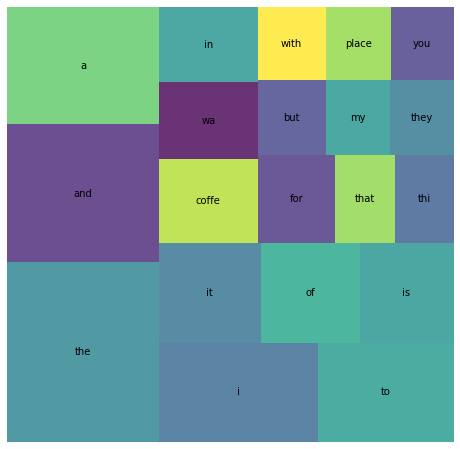

In [241]:
# Stems-
wcStems_top20 = wcStems[wcStems['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcStems_top20['pct_total'], label=wcStems_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [242]:
# Lemmas- Word Counts
wcLemmas = count(shops['lemmas'])
print(wcLemmas.shape)
wcLemmas.head()

KeyError: 'lemmas'

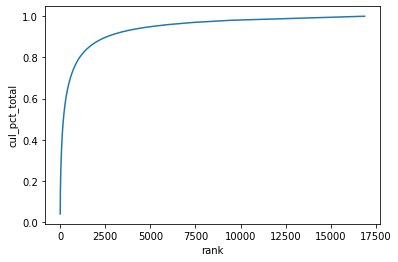

In [83]:
# Lemmas- Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wcLemmas);

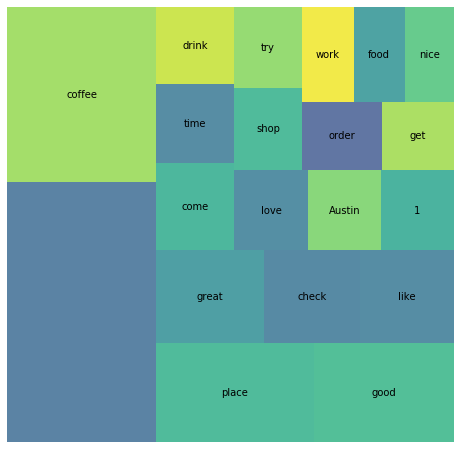

In [84]:
# Lemmas-
wcLemmas_top20 = wcLemmas[wcLemmas['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcLemmas_top20['pct_total'], label=wcLemmas_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [243]:
#Spacy tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [244]:
# Make them tokens using the Tokenizer Pipe
spacy_tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    spacy_tokens.append(doc_tokens)

shops['spaCy_tokens'] = spacy_tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, checkin, Love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[Listed, in, Date, Night, Austin, Ambiance, in..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, checkin, Listed, in, Brunch, Spots, I, lov..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[Very, cool, decor, Good, drinks, Nice, seatin..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, checkin, They, are, located, within, the, ..."


In [245]:
wcSpacy = count(shops['spaCy_tokens'])
print(wcSpacy.shape)
wcSpacy.head()

(24894, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,6521,27893,1.0,0.035160,0.035160,0.856224
47,and,6813,25913,2.0,0.032664,0.067825,0.894564
53,a,6184,22134,3.0,0.027901,0.095725,0.811975
10,I,5483,20017,4.0,0.025232,0.120957,0.719932
61,,4831,18226,5.0,0.022975,0.143932,0.634322


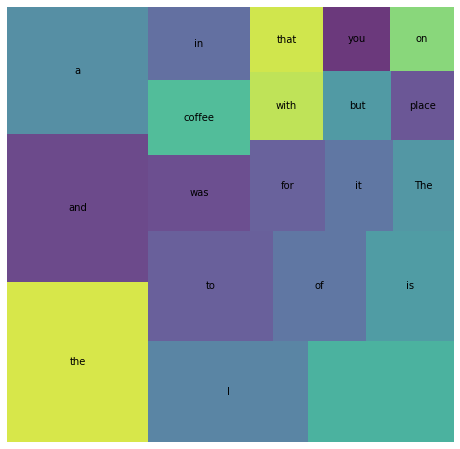

In [246]:
wcSpacy_top20 = wcSpacy[wcSpacy['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcSpacy_top20['pct_total'], label=wcSpacy_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [248]:
#Stop Words
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [249]:
v2tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    v2tokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = v2tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens,spaCy_tokens_v2
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, checkin, Love, love, loved, the, atmospher...","[1, checkin, love, love, loved, atmosphere, co..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[Listed, in, Date, Night, Austin, Ambiance, in...","[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, checkin, Listed, in, Brunch, Spots, I, lov...","[1, checkin, listed, brunch, spots, loved, ecl..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[Very, cool, decor, Good, drinks, Nice, seatin...","[cool, decor, good, drinks, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, checkin, They, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi..."


In [250]:
wcSpacyv2 = count(shops['spaCy_tokens_v2'])
print(wcSpacyv2.shape)
wcSpacyv2.head()

(20257, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,,4831,18226,1.0,0.047003,0.047003,0.634322
33,coffee,4877,10353,2.0,0.026699,0.073702,0.640362
83,place,3659,5426,3.0,0.013993,0.087695,0.480436
149,good,2788,3973,4.0,0.010246,0.097941,0.366071
115,great,2836,3919,5.0,0.010107,0.108047,0.372374


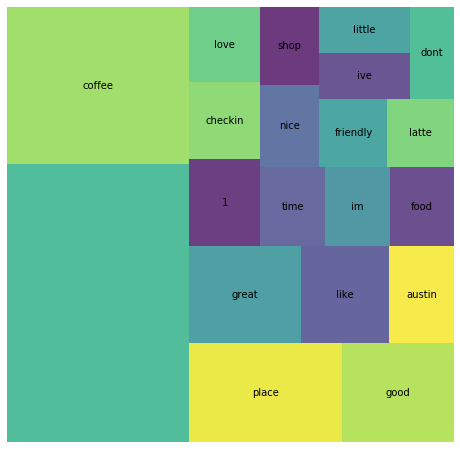

In [251]:
wcSpacyv2_top20 = wcSpacyv2[wcSpacyv2['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcSpacyv2_top20['pct_total'], label=wcSpacyv2_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [252]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [310]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','1', 'check-in', 'checkin','coffee', 'monte', 'listed', "i'm", 'im', "it's", "i've", 'ive', "-", 'place', "don't", 'dont'])
#STOP_WORDS

In [271]:
v3tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    v3tokens.append(doc_tokens)
    
shops['spaCy_tokens_v3'] = v3tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, checkin, Love, love, loved, the, atmospher...","[1, checkin, love, love, loved, atmosphere, co...","[love, love, loved, atmosphere, corner, shop, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[Listed, in, Date, Night, Austin, Ambiance, in...","[listed, date, night, austin, ambiance, austin...","[date, night, austin, ambiance, austin, beauti..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, checkin, Listed, in, Brunch, Spots, I, lov...","[1, checkin, listed, brunch, spots, loved, ecl...","[brunch, spots, loved, eclectic, homey, plush,..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[Very, cool, decor, Good, drinks, Nice, seatin...","[cool, decor, good, drinks, nice, seating, , ...","[cool, decor, good, drinks, nice, seating, ove..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, checkin, They, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi...","[located, northcross, mall, shopping, center, ..."


In [272]:
wcSpacyv3 = count(shops['spaCy_tokens_v3'])
print(wcSpacyv3.shape)
wcSpacyv3.head()

(20250, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
143,good,2788,3973,1.0,0.011445,0.011445,0.366071
109,great,2836,3919,2.0,0.011290,0.022735,0.372374
154,like,2124,3088,3.0,0.008896,0.031631,0.278887
54,austin,1788,2252,4.0,0.006488,0.038119,0.234769
30,love,1500,1935,5.0,0.005574,0.043693,0.196954


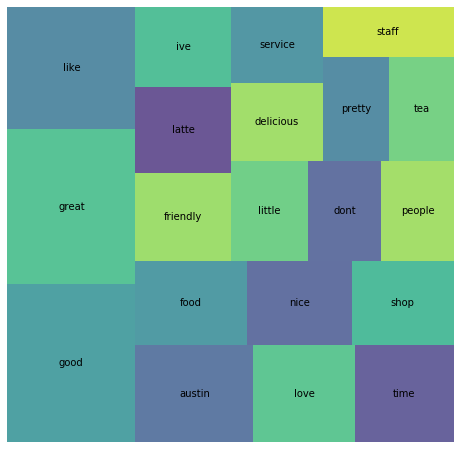

In [273]:
wcSpacyv3_top20 = wcSpacyv3[wcSpacyv3['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcSpacyv3_top20['pct_total'], label=wcSpacyv3_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [274]:
print(shops.shape)
shops.head()

(7616, 9)


,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, checkin, Love, love, loved, the, atmospher...","[1, checkin, love, love, loved, atmosphere, co...","[love, love, loved, atmosphere, corner, shop, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[Listed, in, Date, Night, Austin, Ambiance, in...","[listed, date, night, austin, ambiance, austin...","[date, night, austin, ambiance, austin, beauti..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, checkin, Listed, in, Brunch, Spots, I, lov...","[1, checkin, listed, brunch, spots, loved, ecl...","[brunch, spots, loved, eclectic, homey, plush,..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[Very, cool, decor, Good, drinks, Nice, seatin...","[cool, decor, good, drinks, nice, seating, , ...","[cool, decor, good, drinks, nice, seating, ove..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, checkin, They, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi...","[located, northcross, mall, shopping, center, ..."


In [275]:
Spacy4up = shops[shops['star_rating'] >= 4]
#wcSpacy4up = count(shops(shops['spaCy_tokens_v3']>3))
print(Spacy4up.shape)
Spacy4up.head()

(6140, 9)


,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Every...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, checkin, love, love, love, the, atmospher,...","[1, checkin, Love, love, loved, the, atmospher...","[1, checkin, love, love, loved, atmosphere, co...","[love, love, loved, atmosphere, corner, shop, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[list, in, date, night, austin, ambianc, in, a...","[Listed, in, Date, Night, Austin, Ambiance, in...","[listed, date, night, austin, ambiance, austin...","[date, night, austin, ambiance, austin, beauti..."
2,The Factory - Cafe With a Soul,1 checkin Listed in Brunch Spots I loved the e...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, checkin, list, in, brunch, spot, i, love, ...","[1, checkin, Listed, in, Brunch, Spots, I, lov...","[1, checkin, listed, brunch, spots, loved, ecl...","[brunch, spots, loved, eclectic, homey, plush,..."
4,The Factory - Cafe With a Soul,1 checkin They are located within the Northcro...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, they, are, locat, within, the, no...","[1, checkin, They, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi...","[located, northcross, mall, shopping, center, ..."
5,The Factory - Cafe With a Soul,1 checkin Very cute cafe I think from the mome...,4,11/20/2016,"[1, checkin, very, cute, cafe, i, think, from,...","[1, checkin, veri, cute, cafe, i, think, from,...","[1, checkin, Very, cute, cafe, I, think, from,...","[1, checkin, cute, cafe, think, moment, steppe...","[cute, cafe, think, moment, stepped, wasnt, di..."


In [276]:
wcSpacy4up = count(Spacy4up['spaCy_tokens_v3'])
print(wcSpacy4up.shape)
wcSpacy4up.head()

(17500, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
109,great,2492,3453,1.0,0.012778,0.012778,0.405863
174,good,2192,3096,2.0,0.011457,0.024234,0.357003
194,like,1559,2212,3.0,0.008185,0.032420,0.253909
54,austin,1547,1969,4.0,0.007286,0.039706,0.251954
30,love,1322,1725,5.0,0.006383,0.046089,0.215309


In [277]:
Spacy3d = shops[shops['star_rating'] < 4]
#Spacy3d = count(shops(shops['spaCy_tokens_v3']>3))
print(Spacy3d.shape)
Spacy3d.head()

(1476, 9)


,coffee_shop_name,full_review_text,star_rating,date,tokens,stems,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[veri, cool, decor, good, drink, nice, seat, h...","[Very, cool, decor, Good, drinks, Nice, seatin...","[cool, decor, good, drinks, nice, seating, , ...","[cool, decor, good, drinks, nice, seating, ove..."
8,The Factory - Cafe With a Soul,1 checkin Ok lets try this approach Pros Musi...,3,10/25/2016,"[1, checkin, ok, lets, try, this, approach, pr...","[1, checkin, ok, let, tri, thi, approach, pro,...","[1, checkin, Ok, lets, try, this, approach, ,...","[1, checkin, ok, lets, try, approach, , pros,...","[ok, lets, try, approach, pros, music, seating..."
11,The Factory - Cafe With a Soul,The store has A decoration but honestly the co...,3,11/20/2016,"[the, store, has, a, decoration, but, honestly...","[the, store, ha, a, decor, but, honestli, the,...","[The, store, has, A, decoration, but, honestly...","[store, decoration, honestly, coffee, good, co...","[store, decoration, honestly, good, shop, surr..."
12,The Factory - Cafe With a Soul,1 checkin Listed in 2016 The Third Time is a ...,3,11/17/2016,"[1, checkin, listed, in, 2016, the, third, tim...","[1, checkin, list, in, 2016, the, third, time,...","[1, checkin, Listed, in, 2016, , The, Third, ...","[1, checkin, listed, 2016, , time, charm, fac...","[2016, time, charm, factory, decor, innovative..."
25,The Factory - Cafe With a Soul,Okay so after visiting my friends in LA and tr...,1,12/2/2016,"[okay, so, after, visiting, my, friends, in, l...","[okay, so, after, visit, my, friend, in, la, a...","[Okay, so, after, visiting, my, friends, in, L...","[okay, visiting, friends, la, trying, mint, mo...","[okay, visiting, friends, la, trying, mint, mo..."


In [278]:
wcSpacy3d = count(Spacy3d['spaCy_tokens_v3'])
print(wcSpacy3d.shape)
wcSpacy3d.head()

(9146, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,good,596,877,1.0,0.011406,0.011406,0.403794
16,like,565,876,2.0,0.011393,0.022798,0.382791
123,food,310,484,3.0,0.006295,0.029093,0.210027
214,time,353,478,4.0,0.006217,0.035309,0.239160
124,great,344,466,5.0,0.006060,0.041370,0.233062


In [290]:
diff = wcSpacy3d[['word','count']]
diff2 = wcSpacy4up[['word','count']]
allcounts = pd.merge(diff, diff2, on='word')
allcounts['diffy']=allcounts['count_x']-allcounts['count_y'] #if diffy is negative y>x ~(rating was 4+)
difference = allcounts[['word','diffy']]
# difference['goodbad'] = difference['diffy']
# if difference['diffy'] >= 0:
#     difference['goodbad'] = 'good'
# else:
#     difference['goodbad'] = 'bad'
difference#.head(10)
allcounts

,word,count_x,count_y,diffy
0,good,877,3096,-2219
1,like,876,2212,-1336
2,food,484,1352,-868
3,time,478,1406,-928
4,great,466,3453,-2987
...,...,...,...,...
6391,atop,1,2,-1
6392,dull,1,3,-2
6393,imo,1,10,-9
6394,efficient,1,32,-31


In [281]:
diff = wcSpacy3d[['word','count']]
diff2 = wcSpacy4up[['word','count']]
allcounts = pd.merge(diff2, diff, on='word')
allcounts['diffy']=allcounts['count_x']-allcounts['count_y'] #if diffy is negative y>x (rating was 4+)
difference = allcounts[['word','diffy']]
# difference['goodbad'] = difference['diffy']
# if difference['diffy'] >= 0:
#     difference['goodbad'] = 'good'
# else:
#     difference['goodbad'] = 'bad'
difference#.tail()#.head(10)

,word,diffy
0,great,2987
1,good,2219
2,like,1336
3,austin,1686
4,love,1515
...,...,...
6391,undercooked,-8
6392,sequence,-2
6393,tires,0
6394,latkes,-1


In [301]:
goodish = pd.merge(wcSpacy4up, difference, on='word')
goodish = goodish[goodish['appears_in']>1].sort_values('diffy', ascending=False)
goodish.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,diffy
8,shop,1094,1370,9.0,0.005070,0.066934,0.178176,-1060
10,latte,927,1339,11.0,0.004955,0.076892,0.150977,-1063
13,best,1019,1198,14.0,0.004433,0.090813,0.165961,-1102
11,delicious,1178,1314,12.0,0.004862,0.081754,0.191857,-1226
5,friendly,1399,1462,6.0,0.005410,0.051499,0.227850,-1265
2,like,1559,2212,3.0,0.008185,0.032420,0.253909,-1336
4,love,1322,1725,5.0,0.006383,0.046089,0.215309,-1515
3,austin,1547,1969,4.0,0.007286,0.039706,0.251954,-1686
1,good,2192,3096,2.0,0.011457,0.024234,0.357003,-2219
0,great,2492,3453,1.0,0.012778,0.012778,0.405863,-2987


In [304]:
badish = pd.merge(wcSpacy3d, difference, on='word')
badish = badish[badish['appears_in']>1].sort_values('diffy', ascending=False)
badish.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,diffy
111,rude,92,117,112.0,0.001522,0.303244,0.062331,98
33,asked,152,202,34.0,0.002627,0.147584,0.102981,74
290,meh,45,52,291.0,0.000676,0.481494,0.030488,40
315,horrible,44,49,316.0,0.000637,0.497776,0.029810,38
302,mediocre,47,50,303.0,0.000650,0.489427,0.031843,34
320,rating,44,48,321.0,0.000624,0.500910,0.029810,31
238,attitude,57,63,239.0,0.000819,0.443063,0.038618,30
300,worst,47,50,301.0,0.000650,0.488126,0.031843,28
75,ok,121,145,76.0,0.001886,0.242405,0.081978,27
262,overpriced,54,57,263.0,0.000741,0.461804,0.036585,26


In [312]:
realbad = badish.sort_values('diffy').tail(20)
realbad

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,diffy
659,worse,22,23,660.0,0.000299,0.643162,0.014905,17
636,response,20,24,637.0,0.000312,0.636217,0.013550,17
326,terrible,46,47,327.0,0.000611,0.504604,0.031165,17
711,jerk,11,21,712.0,0.000273,0.658027,0.007453,18
574,watery,24,26,575.0,0.000338,0.616254,0.016260,18
428,bland,34,36,429.0,0.000468,0.558602,0.023035,18
363,poor,39,42,364.0,0.000546,0.525906,0.026423,22
252,waited,50,60,253.0,0.000780,0.454182,0.033875,23
309,paid,42,49,310.0,0.000637,0.493953,0.028455,24
353,disappointing,42,43,354.0,0.000559,0.520379,0.028455,26


In [308]:
realgood = goodish.sort_values('diffy',)
realgood

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,diffy
0,great,2492,3453,1.0,0.012778,0.012778,0.405863,-2987
1,good,2192,3096,2.0,0.011457,0.024234,0.357003,-2219
3,austin,1547,1969,4.0,0.007286,0.039706,0.251954,-1686
4,love,1322,1725,5.0,0.006383,0.046089,0.215309,-1515
2,like,1559,2212,3.0,0.008185,0.032420,0.253909,-1336
...,...,...,...,...,...,...,...,...
2130,mediocre,16,16,2190.0,0.000059,0.844554,0.002606,34
2611,horrible,11,11,2753.0,0.000041,0.872212,0.001792,38
2534,meh,12,12,2659.0,0.000044,0.868271,0.001954,40
384,asked,120,128,385.0,0.000474,0.547118,0.019544,74


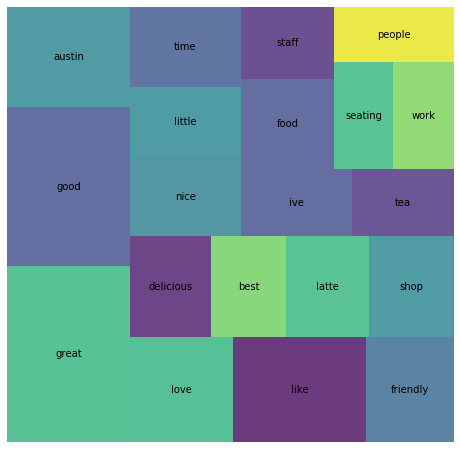

In [309]:
realgood_top20 = realgood[realgood['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=realgood_top20['pct_total'], label=realgood_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

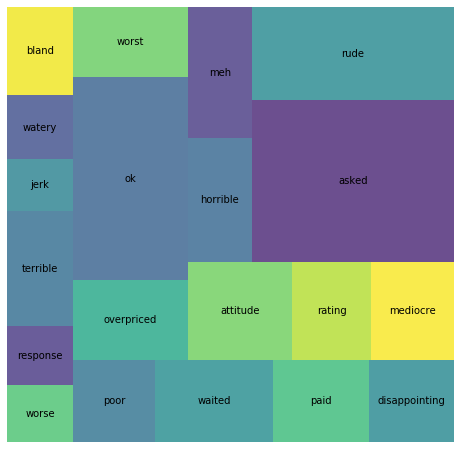

In [314]:
realbad_top20 = realbad #[realbad['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=realbad_top20['pct_total'], label=realbad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

